### Training Progress

Some plots to show the status of animal training on an animal by animal basis. Specifically focusing on the last month when training has stabilized and stage 8 encompasses many things. 

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import re
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from performance_plots import * 
from io_utils import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
df_all = fetch_latest_training_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
training_stabilizing = pd.Timestamp(2022,8,17)
t_window_start = pd.Timestamp("2022-11-01")
df_antib =  df_all[(df_all['date'] > antibias_working)]
df_stable = df_all[(df_all['date'] > training_stabilizing)]

[2022-12-11 12:50:03,542][WARNING]: MySQL server has gone away. Reconnecting to the server.


dropping 0 sessions of 134
fetched 134 sessions for R500 with latest date 2022-12-11
dropping 0 sessions of 137
fetched 137 sessions for R501 with latest date 2022-12-11
dropping 1 sessions of 140
fetched 139 sessions for R502 with latest date 2022-12-11
dropping 1 sessions of 138
fetched 137 sessions for R503 with latest date 2022-12-11
dropping 1 sessions of 140
fetched 139 sessions for R600 with latest date 2022-12-11


### R500


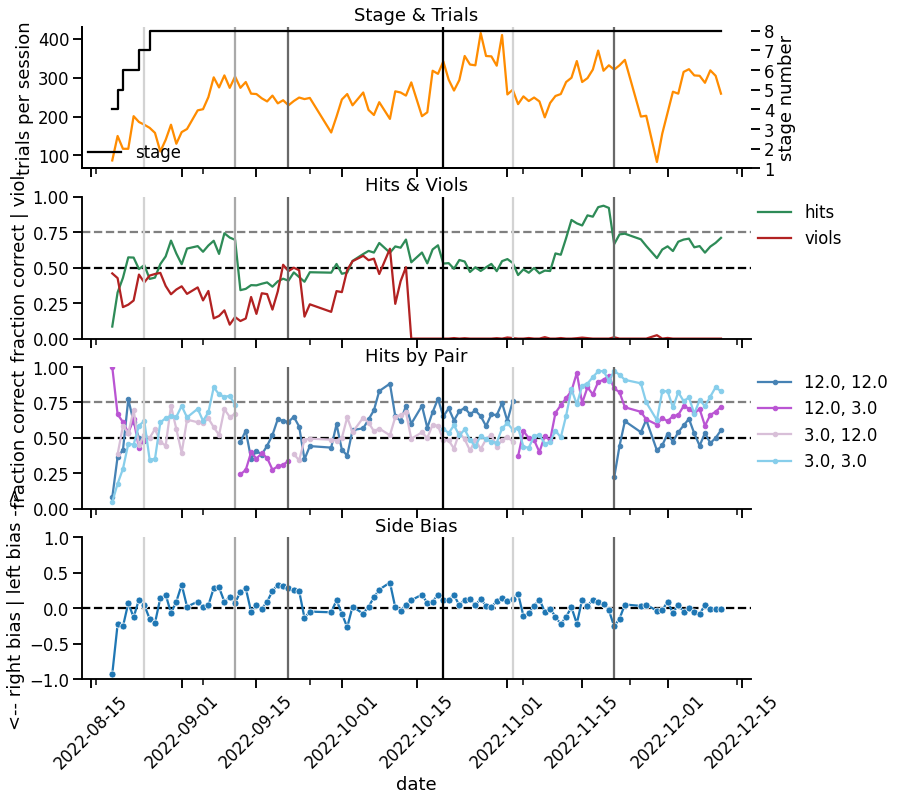

In [209]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R500'
df = df_stable.query("animal_id == 'R500'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[2], 'Hits by Pair')
plot_bias_history(df, axs[3], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-11'), color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-21'), color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-10-20'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-21'), color='dimgray')

    if iax == 1 or iax == 2:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)

12.0, 3.0     139
12.0, 12.0     56
3.0, 3.0       64
Name: sound_pair, dtype: int64


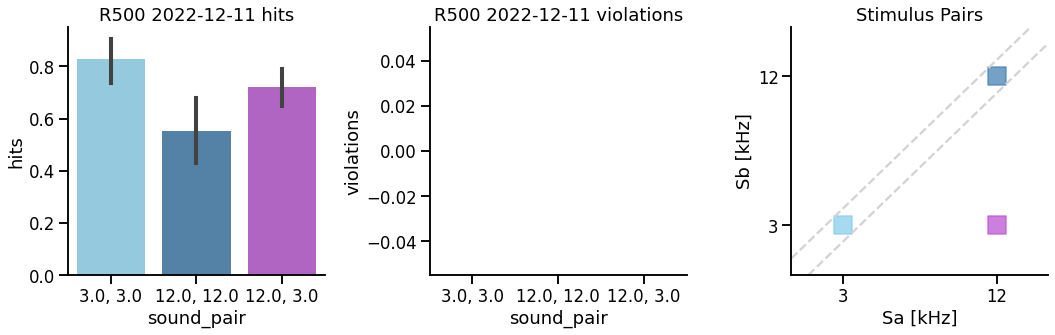

In [210]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R501


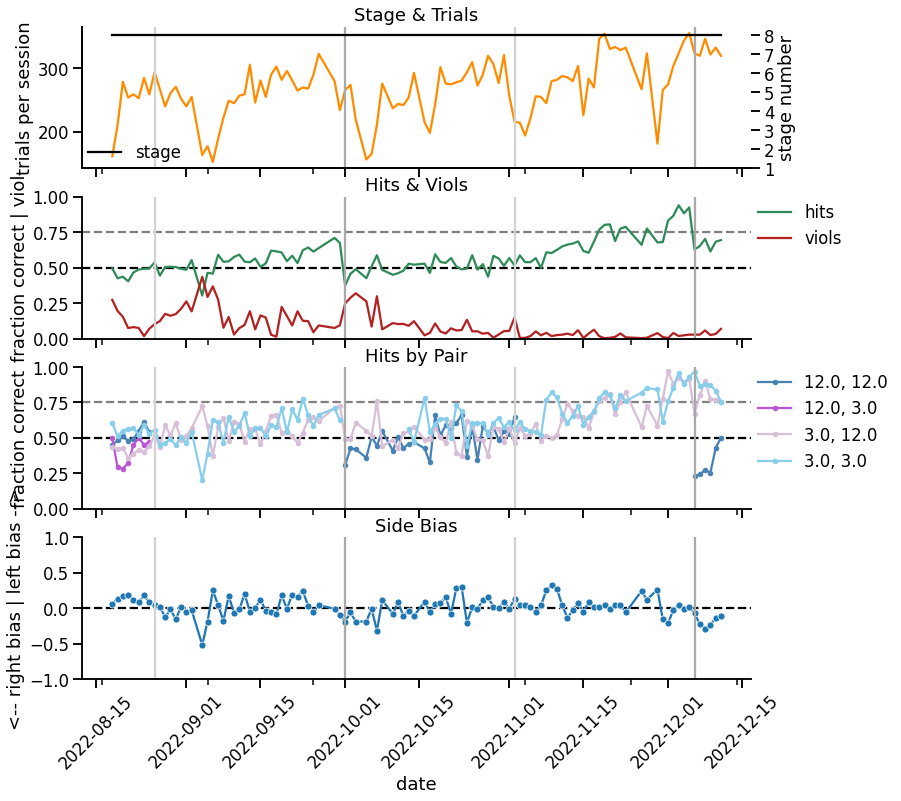

In [211]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R501'
df = df_stable.query("animal_id == 'R501'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[2], 'Hits by Pair')
plot_bias_history(df, axs[3], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-26'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-10-01'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-12-06'),color='darkgray')


    if iax == 1 or iax == 2:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)


12.0, 12.0     76
3.0, 3.0       98
3.0, 12.0     146
Name: sound_pair, dtype: int64


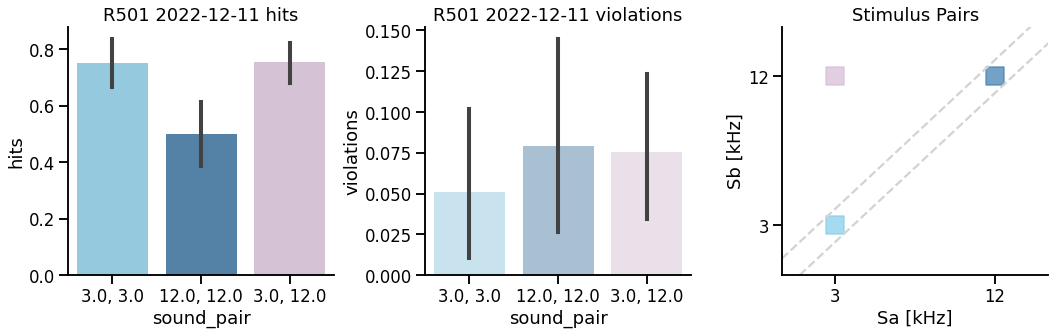

In [212]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R502

This animal is super motivated but is doing really, really short fixations (~ 0.5s) because he has one pace of center left center right. Just seems to be catching onto rule and might be ready to switch though

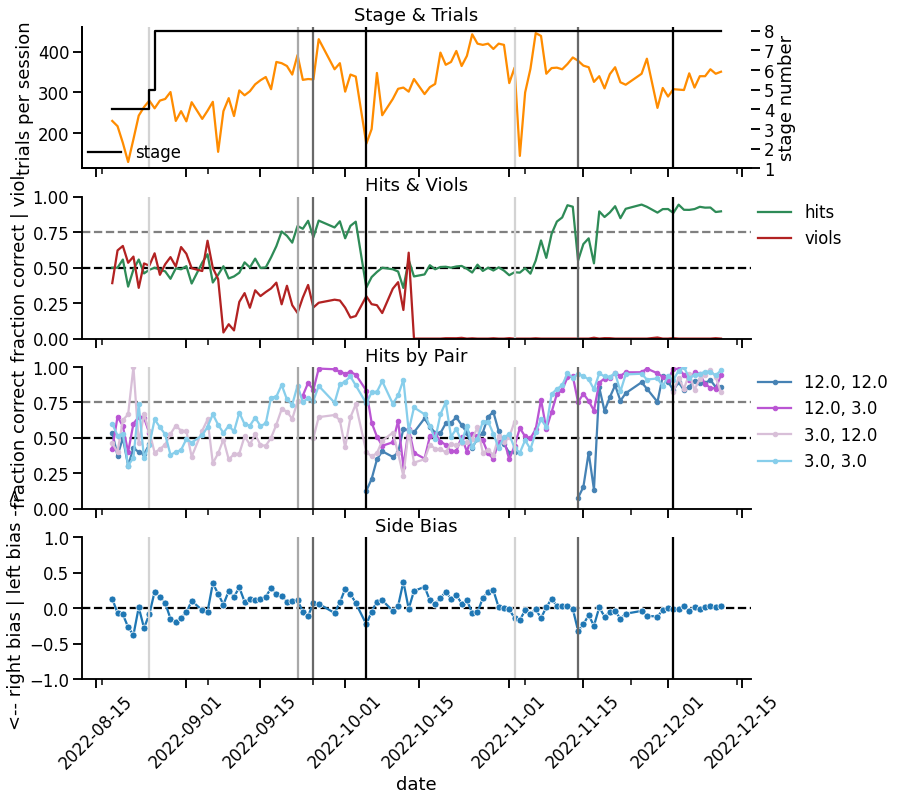

In [213]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R502'
df = df_stable.query("animal_id == 'R502'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[2], 'Hits by Pair')
plot_bias_history(df, axs[3], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-22'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-25'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-10-05'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-14'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-12-02'),color='black')

    if iax == 1 or iax == 2:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)


12.0, 3.0     88
12.0, 12.0    90
3.0, 3.0      84
3.0, 12.0     89
Name: sound_pair, dtype: int64


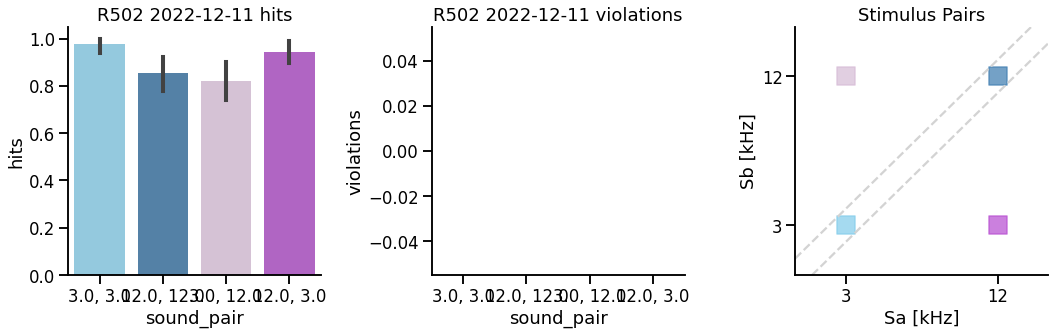

In [214]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R503


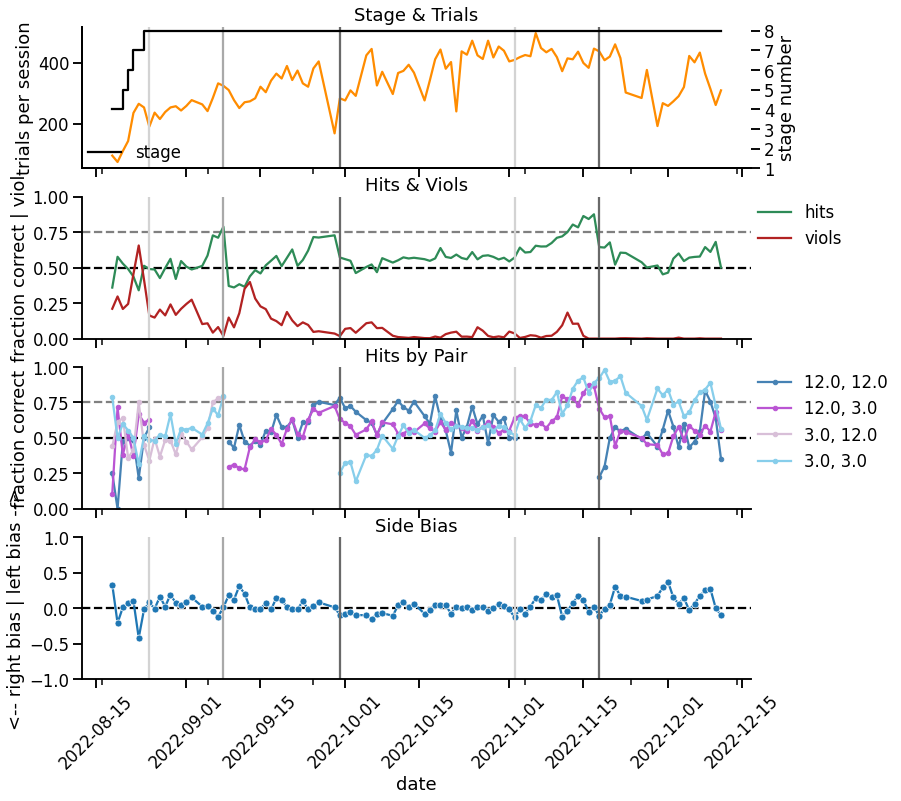

In [215]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R503'
df = df_stable.query("animal_id == 'R503'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[2], 'Hits by Pair')
plot_bias_history(df, axs[3], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-08'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-30'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-18'),color='dimgray')

    if iax == 1 or iax == 2:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)


12.0, 3.0     139
12.0, 12.0     85
3.0, 3.0       85
Name: sound_pair, dtype: int64


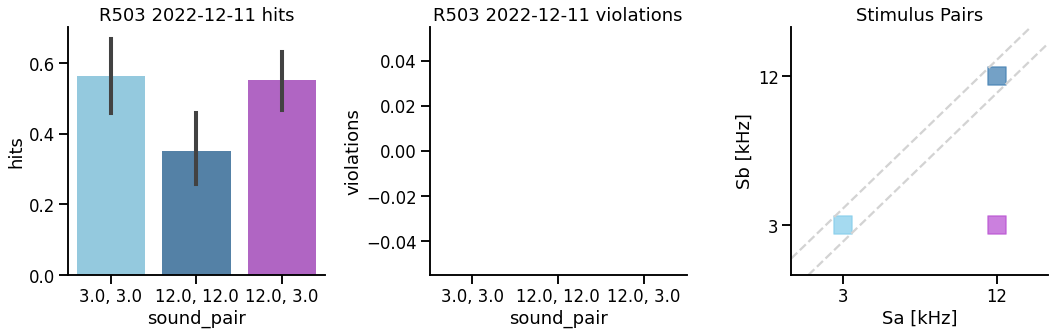

In [216]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()

### R600

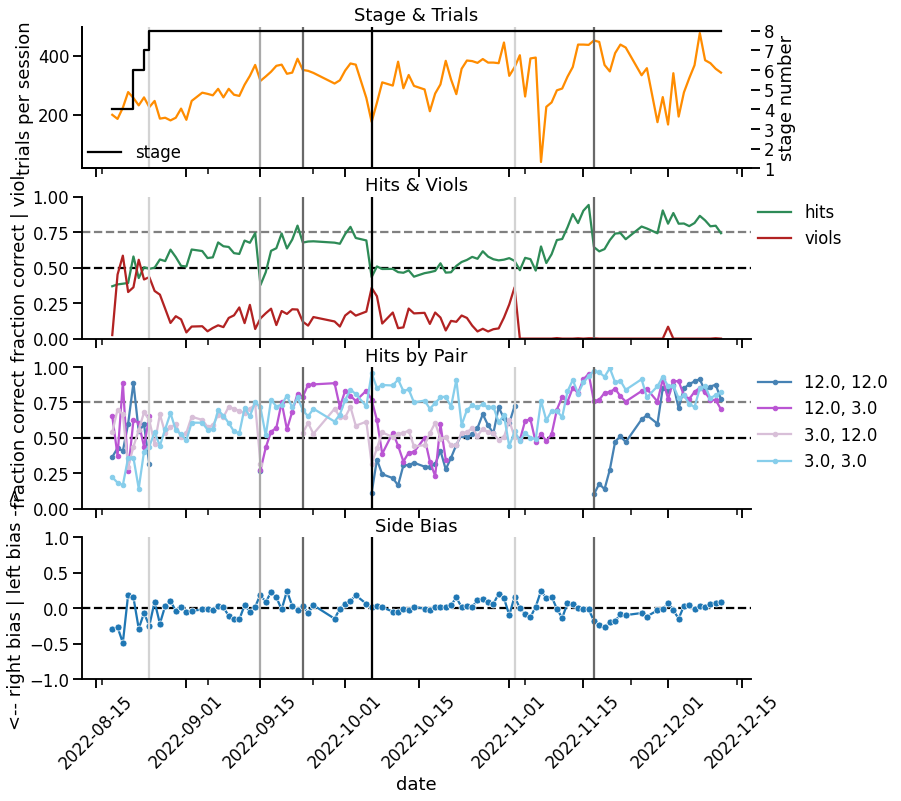

In [217]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R600'
df = df_stable.query("animal_id == 'R600'")
plot_stage_and_trials(df, axs[0], 'Stage & Trials')
plot_hits_and_viols(df, axs[1], 'Hits & Viols')
plot_pair_performance(df, axs[2], 'Hits by Pair')
plot_bias_history(df, axs[3], latest_date=None, n_days_back=None)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-15'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-23'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-10-06'),color='black')
    axs[iax].axvline(pd.Timestamp('2022-11-02'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-11-17'),color='dimgray')

    if iax == 1 or iax == 2:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)
        axs[iax].axhline(0.75, color='gray', linestyle='--', zorder=1)


12.0, 3.0     191
12.0, 12.0     79
3.0, 3.0       73
Name: sound_pair, dtype: int64


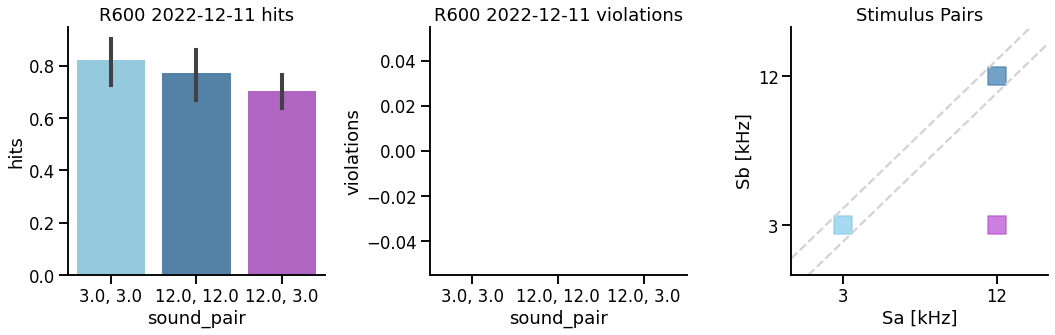

In [218]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])
plot_stim_in_use(df, ax[2])
plt.tight_layout()